> **DO NOT EDIT IF INSIDE `computational_analysis_of_big_data_2018_spring` folder** 

# Week 6: Networks


*Thursday, March 1st, 2018*

A network is a way to represent a system of things that interact or are interrelated in some fashion. It could just be your facebook network, that's obvious, but a network can also represent the interaction patterns of proteins in the human body, who votes what on whose bill in the US Senate, the mutually attractive forces between galaxies in the universe or just about anything else that you can possibly imagine. This week we are going to study how characters in the Marvel universe relate to each other using networks. In the exercises today you will:

* Get warmed up to thinking about systems as networks
* Learn to use the `NetworkX` library
* Explore the partnership network of the Marvel dataset

**Questions**: Outside of class, use [issue on GitHub](https://github.com/ulfaslak/computational_analysis_of_big_data_2018_spring/issues) for asking questions.

**Feedback:** Send me anonymous feedback at http://ulfaslak.com/vent.

## Exercises

### Part 0: Networks

Questions for chapter 1 and 2 of [Network Science](http://barabasi.com/networksciencebook/).

> **Ex. 6.0.1**: List three different real networks and state the nodes and links for each of them.


> **Ex. 6.0.2**: What networks are you personally most interested in. Address the following questions:
>   * What are its nodes and links? 
>   * How large is it? 
>   * Can be mapped out? 
>   * Why do you care about it? 


> **Ex. 6.0.3**: In your view what would be the area where network science could have the biggest impact in the next decade? Explain your answer - and base it on the text in the book. 

> **Ex. 6.0.4**: Section 2.5 states that real networks are sparse. Can you think of a real network where each node has *many* connections? Is that network still sparse? If yes, can you explain why?

### Part 1: The `NetworkX` library

`NetworkX` is the Python library we will be using for working with networks. It should come installed with your Anaconda distribution, but you wont know how to use it yet. The best way to get familiar is to work through a tutorial. That's what the following exercises are about.

> **Ex. 6.1.1**: Go to the `NetworkX` project's [tutorial page](https://networkx.github.io/documentation/stable/tutorial/index.html). Read the first few sections about nodes, edges and attributes. Write an example below where you create a graph, `G`, and then:
1. add some nodes and edges to,
2. print its nodes and edges
3. delete a node, and
4. plot it.

[1, 2, 4, 5, 6, 7, 8, 9, 10]
[(1, 10), (2, 7)]


/System/Library/Frameworks/Python.framework/Versions/2.7/Extras/lib/python/matplotlib/collections.py:608: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors_original != 'face':
/System/Library/Frameworks/Python.framework/Versions/2.7/Extras/lib/python/matplotlib/collections.py:548: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == 'face':


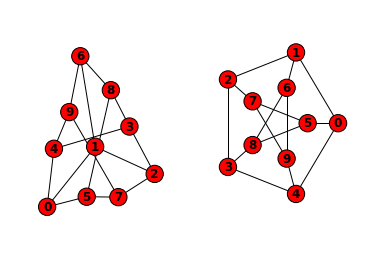

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

G = nx.Graph()
G.add_nodes_from([1,2,3,4,5,6,7,8,9,10])
G.add_edge(1, 10)
G.add_edge(2, 7)
G.remove_node(3)
print G.nodes
print G.edges

G = nx.petersen_graph()
plt.subplot(121)
nx.draw(G, with_labels=True, font_weight='bold')
plt.subplot(122)
nx.draw_shell(G, nlist=[range(5, 10), range(5)], with_labels=True, font_weight='bold')

> **Ex. 6.1.2**: `NetworkX` has lots of functions to generate synthetic networks. One of the most famous types of synthetic networks is called an Erdős–Rényi (ER) network.
1. Describe how to create an ER network.
2. On the [`NetworkX` documentations site](https://networkx.github.io/documentation/networkx-1.10/reference/generators.html), find a method you can use for generating an ER network. Create one with $N=100$ nodes and probability of edge creation $p=0.1$.
3. Plot the network
4. Visualize the [degree distribution](https://en.wikipedia.org/wiki/Degree_distribution) of your newly created ER graph.
    * A node's *degree* is the number of other nodes it is connected to.
    * The *degree distribution* is a histogram which shows the distribution of node degrees.

An Erdos-Renyi network is a synthetic network. One version of it says that for a fixed set of vertices and a fixed number of edges, each potential graph is equally possible. To create an ER network you would collect each potential connection between nodes in the network. Then you would randomly shuffle this list and take the first n edges where n represents how many edges you want the graph to have. Another version of it says that for a fixed set of vertices, each edge has a fixed probability of being present. To create this, you would similarly generate every possible edge and then assign it a random float from 0 to 1. If 1 - z > p, then this edge would be present where z is the assigned number and p is the fixed probability the edge is present.

In [2]:
er = nx.erdos_renyi_graph(100, 0.1)

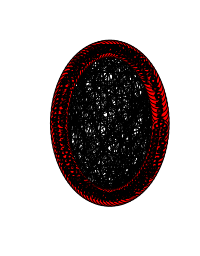

In [3]:
plt.subplot(121)
nx.draw_shell(er, with_labels=True, font_weight='bold')

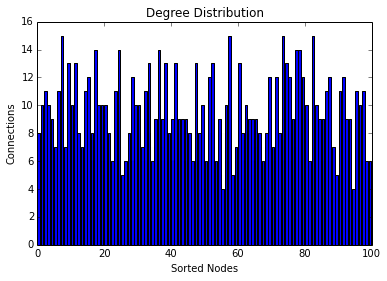

In [4]:
degrees = dict(nx.degree(er))
plt.bar(degrees.keys(), degrees.values())
plt.title("Degree Distribution")
plt.ylabel("Connections")
plt.xlabel("Sorted Nodes")
plt.show()

> **Ex. 6.1.3**: Another very famous type of synthetic network is the Barabási–Albert (BA) network.
1. Describe what a BA network is and how to create one.
2. On the [`NetworkX` documentations site](https://networkx.github.io/documentation/networkx-1.10/reference/generators.html), find a method you can use for generating a BA network. Create one with $N=100$ nodes and number of new edges from each new node $m=2$.
3. Plot the network
4. Visualize the [degree distribution](https://en.wikipedia.org/wiki/Degree_distribution) of your newly created BA graph.
5. Explain the main difference(s) you observe, when comparing to the ER network.
6. Are there other measures we could have used to describe the ER and BA networks further?

A BA network is a scale free network. A scale free network contains nodes that act as hubs. These hubs accumulate very high degrees of connectivity. As the network gets bigger, these nodes will accumulate more and more connections while the less connected nodes keep a relatively constant amount of connections. They follow a power law degree distribution. This just means some nodes have a lot more degrees than others. These networks are characterized by continued growth in the number of nodes and the preferential attachment, that new nodes want to connect to heavily connected nodes.

To create a BA network, you start with a m nodes. The edges are chosen randomly, similar to an ER network. However, every node must have at least one edge. Then, the network continuously grows. You select a time interval and then at each time interval you add a new node. Then you add edges for the new node according to a probability that favors nodes with higher degrees.

In [5]:
ba = nx.barabasi_albert_graph(100, 2)

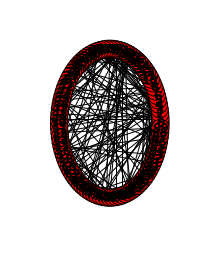

In [6]:
plt.subplot(121)
nx.draw_shell(ba, with_labels=True, font_weight='bold')

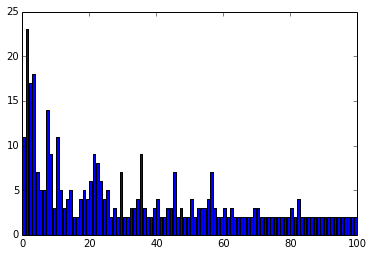

In [7]:
degrees = dict(nx.degree(ba))
plt.bar(degrees.keys(), degrees.values())
plt.show()

Now that you know how to build a network in `NetworkX`, visualize it and plot some statistics, you are ready to analyze our Marvel dataset. The aim of the following exercises is to analyze the network *partnerships* between characters.

### Part 2: Marvel character partners

> **Ex. 6.2.1**: Write a function called `get_partners` that takes a character name, and extracts a list of their partners. Print the partnerships of Iron Man. They should be `['War Machine', 'Pepper Potts', 'Riri Williams']`.

>*Hint: Partnerships for a character are listed in the same way that alliances are. You can probably save yourself some time by looking at your solution to Ex. 4.1.1.*

In [8]:
import os,re
## Gets the list of partners for a given character
def get_partners(character_name):
    ## Find character in the folders
    for faction in ["heroes", "ambiguous", "villains"]:
        faction_chars = [c[:-4] for c in os.listdir("../data/%s" % faction)]
        if character_name in faction_chars:
            break
    ## Grab markup from file
    with open("../data/%s/%s.txt" % (faction, character_name)) as fp:
        markup = fp.read()
    ## Use regexs to extract partners     
    partners_field = re.findall(r"partners[\w\W]+?\n", markup)
    if partners_field == []: 
        return [] # return nothing if list is empty
    else:
        return [t[2:-1] for t in re.findall(r"\[\[.+?[\]\|]", partners_field[0][10:])] # format list

print get_partners("Iron Man")

['War Machine', 'Pepper Potts', 'Riri Williams']


> **Ex: 6.2.2**: Create a `networkx.Graph` that represents each partnership between characters, as an edge. Print the number of nodes, edges and average degree of the resulting network.

In [14]:
pg = nx.Graph()
# Loop through all of the characters
for faction in ["heroes", "ambiguous", "villains"]:
    faction_chars = [c[:-4] for c in os.listdir("../data/%s" % faction)]
    for char in faction_chars:
        if char[0] == ".": continue
        # Create node if necessary
        if char not in list(pg.nodes): pg.add_node(char)
        # Get partners for the char
        partners = get_partners(char)
        # Add corresponding edges
        for p in partners:
            if (p, char) in pg.edges: continue
            pg.add_edge(char, p)
# Print out informations
print "Number of nodes: " + str(pg.number_of_nodes())
print "Number of edges: " + str(pg.number_of_edges())
print "Average  degree: " + str(pg.number_of_edges() * 2/float(pg.number_of_nodes()))

Number of nodes: 2181
Number of edges: 469
Average  degree: 0.430077945896


> **Ex: 6.2.3**: Plot the degree distribution of your character network. What type of random network does it resemble?

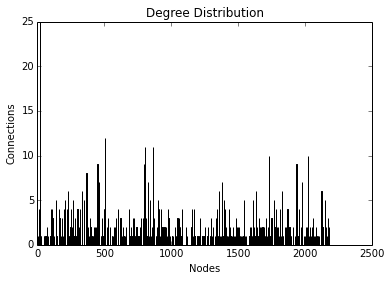

In [15]:
degrees = dict(nx.degree(pg))
plt.bar(range(1, len(degrees.keys())+1), degrees.values())
plt.title("Degree Distribution")
plt.ylabel("Connections")
plt.xlabel("Nodes")
plt.show()

> **Ex: 6.2.4**: Create a bar chart (similar in style to the one in Ex. 3.2.1) with the 10 most high-degree characters in each class. Make sure that each subfigure has the same y-axis (control with `plt.ylim` or use `plt.subplots` with parameter `sharey=True`).

In [27]:
import operator # for sorting a dictionary
## Init lists for each faction
heroes = [c[:-4] for c in os.listdir("../data/heroes")]
villains = [c[:-4] for c in os.listdir("../data/villains")]
ambiguous = [c[:-4] for c in os.listdir("../data/ambiguous")]
## Sort the dictionary of degrees by value
sorted_edge_tuples = sorted(degrees.items(), key=operator.itemgetter(1), reverse=True)
## Init lists of 10 nodes with highest degree for each list for each faction
top_heroes = list()
top_villains = list()
top_ambiguous = list()
## Fill up lists from the dictionary
for char, value in sorted_edge_tuples:
    if char in heroes and len(top_heroes) < 10: 
        top_heroes.append((char, value))
    elif char in villains and len(top_villains) < 10: 
        top_villains.append((char, value))
    elif char in ambiguous and len(top_ambiguous) < 10: 
        top_ambiguous.append((char, value))
    if len(top_heroes) >= 10 and len(top_villains) >= 10 and len(top_ambiguous) >= 10: break
## Plot bar graphs


> **Ex: 6.2.5**: Create a bar chart (similar in style to the one in Ex. 3.2.1) for each class with the characters that has the highest [betweenness centrality](https://networkx.github.io/documentation/networkx-1.10/reference/generated/networkx.algorithms.centrality.betweenness_centrality.html) (BC). Again, make sure the y-axes are shared. When you comment on the result:
* Explain briefly what the BC measures (and why it takes a short while to compute it). An intuitive explanation is also great!
* Interpret, if you can, what the differences you see between the distribution of degree and BC means for the different classes.

> **Ex: 6.2.6**: Create yet another similar bar chart where instead you measure the [local clustering coefficient](https://networkx.github.io/documentation/stable/reference/algorithms/generated/networkx.algorithms.cluster.clustering.html#networkx.algorithms.cluster.clustering) (CC).
* Explain briefly what the CC measures, and what it intuitively means that a node is highly clustered (CC=1) or not clustered at all (CC=0).
* Interpret the difference between classes.

> **Ex: 6.2.BONUS**: There seems to be some correlation between BC, degree and clustering, but it definitely doesn't look perfect. Try to make a scatter plot of characters' degree vs. their BC. If time permits, pimp your plot by:
* Prettifying your plot by:
    * Setting appropriate axis limits and labels
    * Fontsizes, figure title, etc.
    * Adding a slight amount of *jitter* to the degree
* Coloring nodes by class (hero: blue, villain: red, ambiguous: yellow)
* Scaling node sizes by the CC (add an offset so no nodes have size 0).

> Highlight your findings:
* Which characters have an unusually high centrality compared to their degree and vice versa? How can you explain this?
* Does this inspire you to think about new things that can be investigated?

> **Ex: 6.2.7**: We want to plot the network so we can visually get a feeling for how characters are connected. However, the network is too big to plot without some kind of pre-processing. Therefore, we remove all links between nodes that are not on the top 10 list of high-degree characters within their class.
* Color the nodes by class. Try if you can to use blue for heroes, red for villains and yellow for ambiguous.
* Scale the size of nodes by the square root of their degree.
* Adjust the layout of the figure so it doesn't look too messy (e.g. edge line width, node line width, type of force-layout [I can recommend *neato*, but you have to install graphviz with conda to use it])
* Do you see anything interesting? Get any new ideas for things that can be investigated?